# Importing Libraries

In [1]:
import pandas as pd
from sklearn import svm
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gzip
import numpy as np

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

# Creating A function that will upload to Dataset

In [2]:
def load_mnist( path, kind='train'):
    

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels
data_path=''



# Creating Pandas DataFrame with test and train dataset

In [3]:
train_image, train_label= load_mnist(data_path,kind='train')
feat_cols = [ 'pixel'+str(i) for i in range(train_image.shape[1]) ]
dataset = pd.DataFrame(train_image,columns=feat_cols)
dataset['label'] = train_label
dataset.shape

(60000, 785)

In [4]:
test_image, test_label= load_mnist(data_path,kind='t10k')
feat_cols = [ 'pixel'+str(i) for i in range(test_image.shape[1]) ]
test_set = pd.DataFrame(test_image,columns=feat_cols)
test_set['label'] = test_label
test_set.shape

(10000, 785)

# Overview 

* Normalize the dataset before you start training.
* Split the dataset into train, validate and test (70% - 20% - 10%). Some datasets offer these three subsets, so you can use them directly as they are.
* Include the table and graphics presentations shown in the template for descriptive statistics (Part 12.Classification).
* Use one of the optimizers (Adam, AdaMax, Nadam, AMSGrad etc).
* Choose activation function different than in 3b).
* Make experiments with dropout and dropout plus regularization (shown below) with red color.
* Evaluate test results using confusion matrix, the rest of the measures that you already have, ROC and AUC.
* Except tables for this evaluation provide graphics of normalized confusion matrix, ROC/AUC and Precision-Recall curves.
* Add result analysis (not less than one page, font Times New Roman, size 11, single space.

# Checking Null Points

In [5]:
dataset.isnull().sum().sum()


0

In [6]:
X = dataset.drop('label',axis=1)
Y = dataset['label']

# Normalizing Dataset

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
Y=pd.get_dummies(Y).values
Y

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Split the dataset into train, validate and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

# # Training and fitting the base model

In [10]:
model = Sequential()
model.add(Dense(units=64,activation='relu',bias_initializer='zeros'))
model.add(Dense(units=32,activation='relu',bias_initializer='zeros'))
model.add(Dense(units=32,activation='relu',bias_initializer='zeros'))
model.add(Dense(units=32,activation='relu',bias_initializer='zeros'))
model.add(Dense(units=32,activation='relu',bias_initializer='zeros'))
model.add(Dense(units=32,activation='relu',bias_initializer='zeros'))


model.add(Dense(units=10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          batch_size=128,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/40
329/329 [==============================] - 1s 3ms/step - loss: 0.8006 - accuracy: 0.7178 - val_loss: 0.5122 - val_accuracy: 0.8155
Epoch 2/40
329/329 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.8343 - val_loss: 0.4693 - val_accuracy: 0.8319
Epoch 3/40
329/329 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.8481 - val_loss: 0.4486 - val_accuracy: 0.8374
Epoch 4/40
329/329 [==============================] - 1s 3ms/step - loss: 0.3895 - accuracy: 0.8595 - val_loss: 0.4127 - val_accuracy: 0.8546
Epoch 5/40
329/329 [==============================] - 1s 3ms/step - loss: 0.3699 - accuracy: 0.8652 - val_loss: 0.4032 - val_accuracy: 0.8560
Epoch 6/40
329/329 [==============================] - 1s 3ms/step - loss: 0.3499 - accuracy: 0.8730 - val_loss: 0.4026 - val_accuracy: 0.8555
Epoch 7/40
329/329 [==============================] - 1s 3ms/step - loss: 0.3337 - accuracy: 0.8784 - val_loss: 0.3733 - val_accuracy: 0.8677
Epoch 

In [12]:
results= pd.DataFrame(model.history.history)

results.rename(columns={'loss':'Training loss','val_loss':'Validation loss',
                   'accuracy':'Training accuracy','val_accuracy':'Validation accuracy',}, inplace=True)
results.head()

,Training loss,Training accuracy,Validation loss,Validation accuracy
0,0.800630,0.717809,0.512237,0.815500
1,0.471770,0.834262,0.469350,0.831889
2,0.422911,0.848071,0.448603,0.837444
3,0.389477,0.859500,0.412698,0.854611
4,0.369890,0.865238,0.403189,0.856000


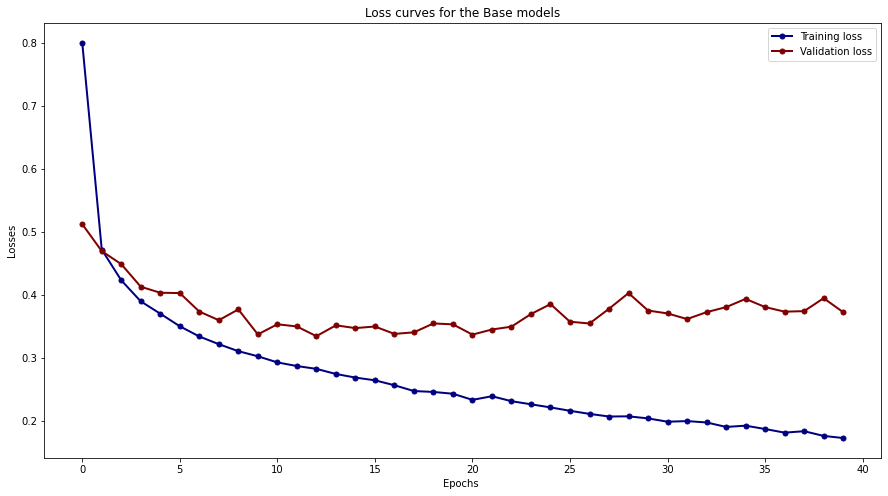

In [13]:
plt.rcParams["figure.figsize"] = (15,8)

losses= results[["Training loss","Validation loss"]] 
accuracies=results[["Training accuracy","Validation accuracy"]]

ax = losses.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Loss curves for the Base models')
# set labels for both axes
ax.set(xlabel='Epochs ', ylabel='Losses')
plt.show()

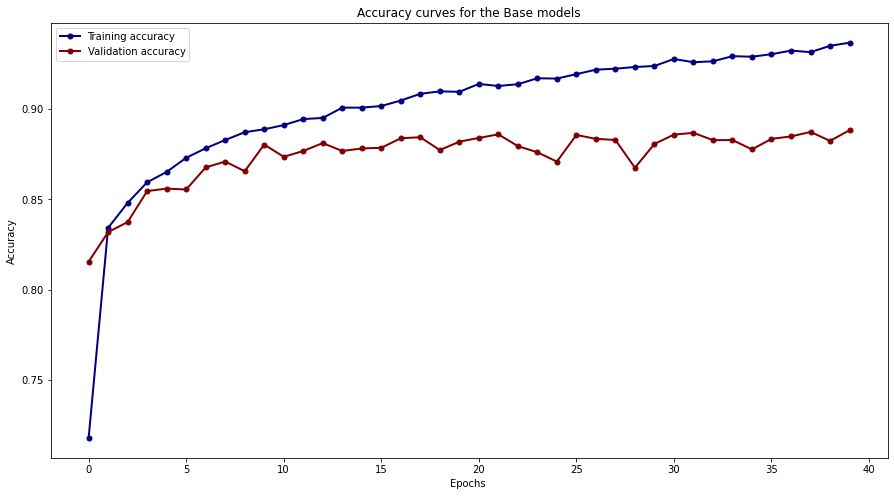

In [14]:
ax = accuracies.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Accuracy curves for the Base models')
# set labels for both axes
ax.set(xlabel='Epochs ', ylabel='Accuracy')
plt.show()

#  Confusion Matrix and classification report for Base model

In [15]:
# convert back the dummy variables into a list to run the classification report
y_True = pd.DataFrame(y_test)
y_True = y_True.idxmax(axis=1).to_list()

In [16]:
# base model predictions 
base_predictions= model.predict_classes(X_test)
print(classification_report(y_True,base_predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1783
           1       0.99      0.97      0.98      1777
           2       0.85      0.78      0.82      1822
           3       0.87      0.92      0.90      1810
           4       0.80      0.84      0.82      1787
           5       0.97      0.95      0.96      1855
           6       0.69      0.77      0.73      1803
           7       0.93      0.95      0.94      1728
           8       0.96      0.97      0.97      1816
           9       0.96      0.95      0.95      1819

    accuracy                           0.89     18000
   macro avg    

In [17]:
df = pd.DataFrame(classification_report(y_True,base_predictions, digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.886084,0.767807,0.822716,1783
1,0.985755,0.973551,0.979615,1777
2,0.849673,0.784852,0.815977,1822
3,0.872117,0.919337,0.895105,1810
4,0.803410,0.843872,0.823144,1787
5,0.966176,0.954717,0.960412,1855
6,0.688778,0.765946,0.725315,1803
7,0.934659,0.951968,0.943234,1728
8,0.963915,0.970815,0.967353,1816
9,0.957895,0.950522,0.954194,1819


#  Confusion Matrix for Base model

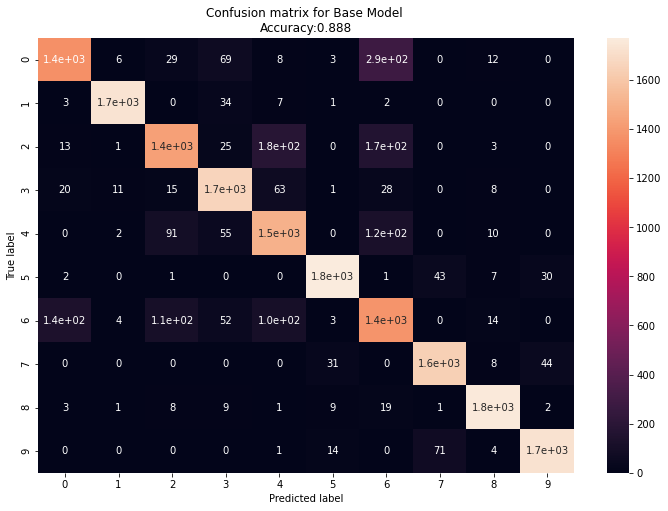

In [18]:
cm = confusion_matrix(y_True,base_predictions) 
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion matrix for Base Model \nAccuracy:{0:.3f}'.format(accuracy_score(y_True,base_predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC/AUC Scoring and Plotting

In [19]:
def Undummy(y_test):
    df = pd.DataFrame(y_test)
    df=df[df==1].stack().reset_index().drop(0,1)
    y_actual=df['level_1']
    y_actual=y_actual.to_numpy()
    return y_actual
y_actual=Undummy(y_test)



Instructions for updating:
Please use `model.predict()` instead.


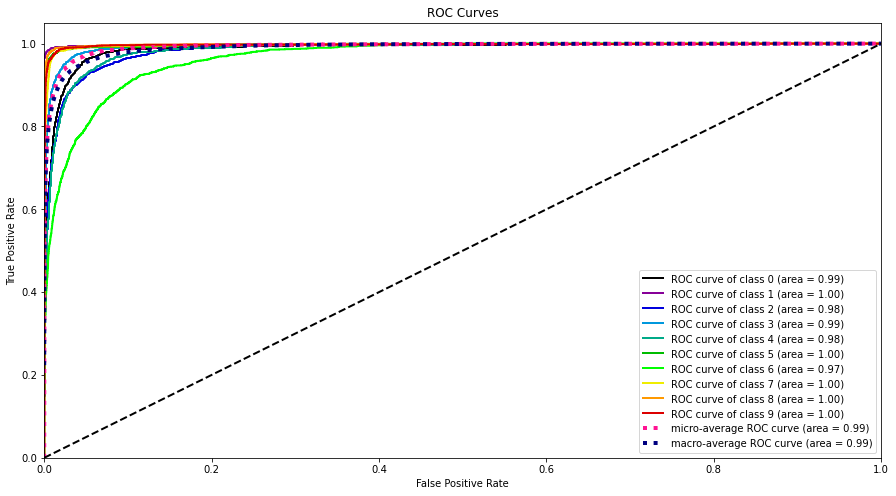

In [20]:
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_actual, y_probas)

plt.show()

In [21]:
auc1 =  roc_auc_score(y_actual, y_probas, multi_class="ovo")
auc1

0.9906438106323704

In [22]:
auc2 =  roc_auc_score(y_actual, y_probas, multi_class="ovr")
auc2

0.9906445586473523

# Precision-Recall curves

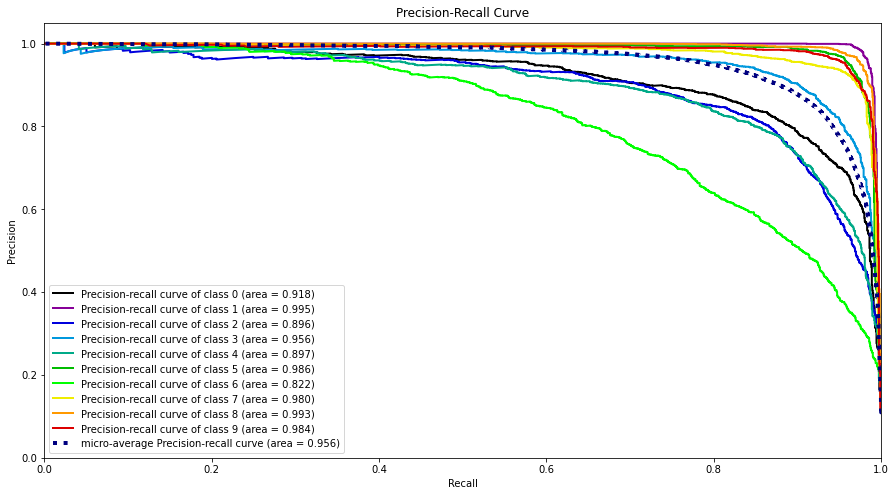

In [23]:
skplt.metrics.plot_precision_recall(y_actual, y_probas)
plt.show()

# Training and fitting the base model With added Dropout

In [24]:
model_drop = Sequential()
model_drop.add(Dense(units=64,activation='relu',bias_initializer='zeros'))
model_drop.add(Dropout(0.4))
model_drop.add(Dense(units=32,activation='relu',bias_initializer='zeros'))
model_drop.add(Dropout(0.4))
model_drop.add(Dense(units=32,activation='relu',bias_initializer='zeros'))
model_drop.add(Dropout(0.4))
model_drop.add(Dense(units=32,activation='relu',bias_initializer='zeros'))
model_drop.add(Dropout(0.4))
model_drop.add(Dense(units=32,activation='relu',bias_initializer='zeros'))
model_drop.add(Dropout(0.4))
model_drop.add(Dense(units=32,activation='relu',bias_initializer='zeros'))
model_drop.add(Dropout(0.4))

model_drop.add(Dense(units=10,activation='softmax'))

model_drop.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
early_stop=EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=25)

In [26]:
model_drop.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          batch_size=128,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/40
329/329 [==============================] - 1s 4ms/step - loss: 2.1175 - accuracy: 0.2015 - val_loss: 1.7117 - val_accuracy: 0.4094
Epoch 2/40
329/329 [==============================] - 1s 3ms/step - loss: 1.6447 - accuracy: 0.3109 - val_loss: 1.4103 - val_accuracy: 0.4463
Epoch 3/40
329/329 [==============================] - 1s 3ms/step - loss: 1.4599 - accuracy: 0.3901 - val_loss: 1.2505 - val_accuracy: 0.4752
Epoch 4/40
329/329 [==============================] - 1s 3ms/step - loss: 1.3614 - accuracy: 0.4262 - val_loss: 1.1761 - val_accuracy: 0.4862
Epoch 5/40
329/329 [==============================] - 1s 3ms/step - loss: 1.3002 - accuracy: 0.4496 - val_loss: 1.1305 - val_accuracy: 0.4843
Epoch 6/40
329/329 [==============================] - 1s 3ms/step - loss: 1.2611 - accuracy: 0.4622 - val_loss: 1.0780 - val_accuracy: 0.5173
Epoch 7/40
329/329 [==============================] - 1s 4ms/step - loss: 1.2348 - accuracy: 0.4704 - val_loss: 1.0935 - val_accuracy: 0.4865
Epoch 

In [27]:
results_drop= pd.DataFrame(model_drop.history.history)

results_drop.rename(columns={'loss':'Training loss','val_loss':'Validation loss',
                   'accuracy':'Training accuracy','val_accuracy':'Validation accuracy',}, inplace=True)
results_drop.head()

,Training loss,Training accuracy,Validation loss,Validation accuracy
0,2.117496,0.201476,1.711688,0.409389
1,1.644700,0.310929,1.410347,0.446333
2,1.459931,0.390095,1.250462,0.475222
3,1.361398,0.426238,1.176126,0.486167
4,1.300195,0.449571,1.130486,0.484333


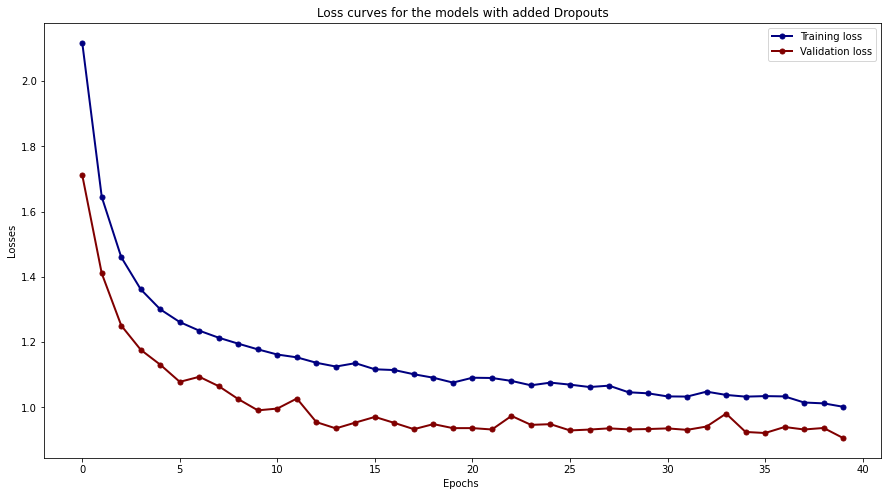

In [28]:
losses_drop= results_drop[["Training loss","Validation loss"]] 
accuracies_drop=results_drop[["Training accuracy","Validation accuracy"]]

ax = losses_drop.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Loss curves for the models with added Dropouts')
# set labels for both axes
ax.set(xlabel='Epochs ', ylabel='Losses')
plt.show()

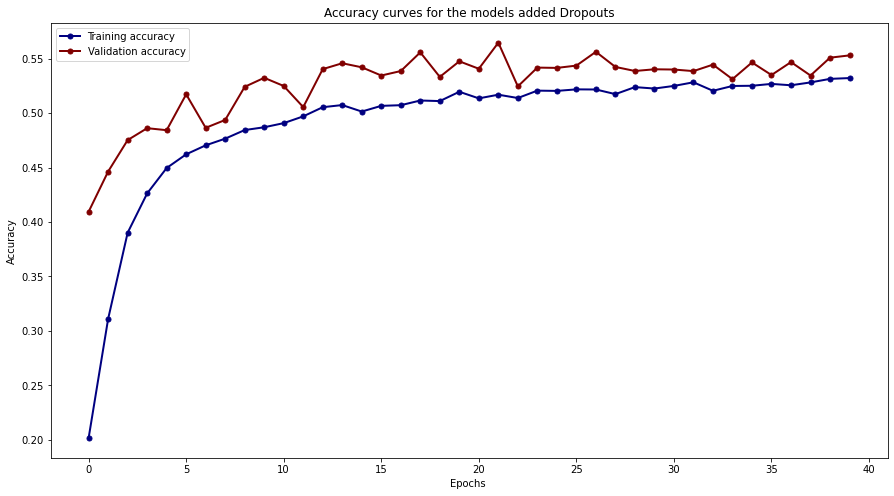

In [29]:
ax = accuracies_drop.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Accuracy curves for the models added Dropouts')
# set labels for both axes
ax.set(xlabel='Epochs ', ylabel='Accuracy')
plt.show()

# Accuracy score and classification report for model With added Dropout

In [30]:
drop_predictions= model_drop.predict_classes(X_test)
print(classification_report(y_True,drop_predictions))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1783
           1       0.93      0.96      0.95      1777
           2       0.38      0.93      0.54      1822
           3       0.62      0.89      0.73      1810
           4       0.71      0.01      0.02      1787
           5       0.76      0.03      0.06      1855
           6       0.00      0.00      0.00      1803
           7       0.00      0.00      0.00      1728
           8       0.85      0.98      0.91      1816
           9       0.34      0.99      0.51      1819

    accuracy                           0.55     18000
   macro avg       0.54      0.55      0.45     18000
weighted avg       0.54      0.55      0.45     18000



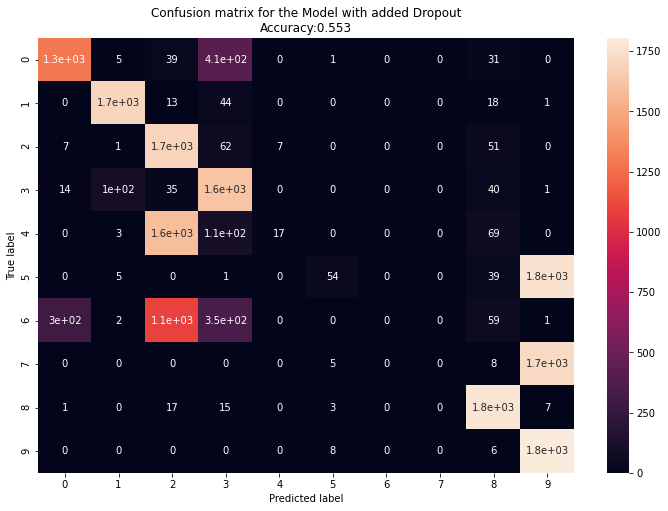

In [31]:
cm = confusion_matrix(y_True,drop_predictions) 
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion matrix for the Model with added Dropout\nAccuracy:{0:.3f}'.format(accuracy_score(y_True,drop_predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC/AUC Scoring and Plotting

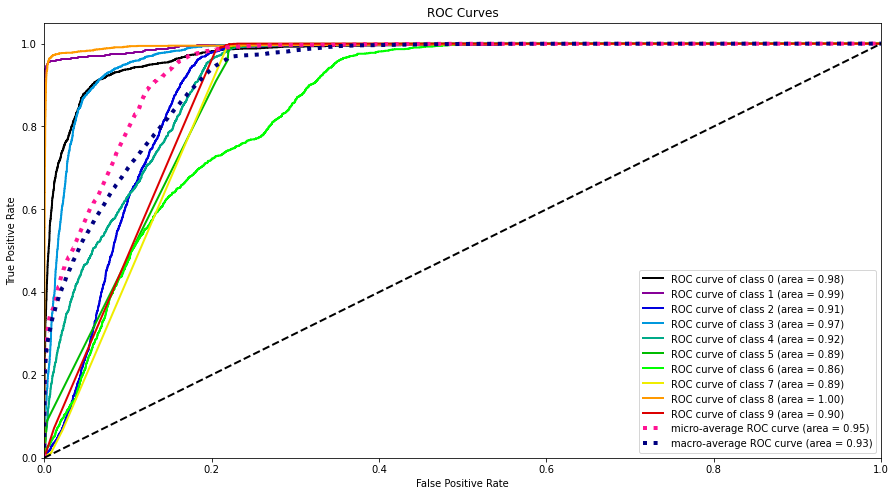

In [32]:
y_probas = model_drop.predict_proba(X_test)
skplt.metrics.plot_roc(y_actual, y_probas)

plt.show()

In [33]:
auc1 =  roc_auc_score(y_actual, y_probas, multi_class="ovo")
auc1

0.9302948070495154

In [34]:
auc2 =  roc_auc_score(y_actual, y_probas, multi_class="ovr")
auc2

0.9302752484218528

# Precision-Recall curves

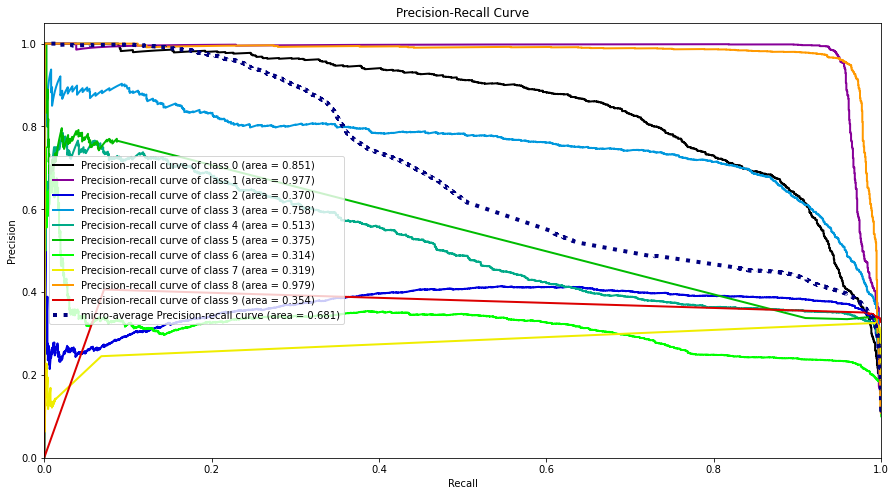

In [35]:
skplt.metrics.plot_precision_recall(y_actual, y_probas)
plt.show()

# Training and fitting the base model With added Dropout + L2 norm

In [36]:
model_L2 = Sequential()
model_L2.add(Dense(units=64,activation='relu',bias_initializer='zeros',kernel_regularizer=l2(0.05)))
model_L2.add(Dropout(0.4))
model_L2.add(Dense(units=32,activation='relu',bias_initializer='zeros',kernel_regularizer=l2(0.05)))
model_L2.add(Dropout(0.4))
model_L2.add(Dense(units=32,activation='relu',bias_initializer='zeros',kernel_regularizer=l2(0.05)))
model_L2.add(Dropout(0.4))
model_L2.add(Dense(units=32,activation='relu',bias_initializer='zeros',kernel_regularizer=l2(0.05)))
model_L2.add(Dropout(0.4))
model_L2.add(Dense(units=32,activation='relu',bias_initializer='zeros',kernel_regularizer=l2(0.05)))
model_L2.add(Dropout(0.4))


model_L2.add(Dense(units=10,activation='softmax'))

model_L2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model_L2.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          batch_size=128,
          validation_data=(X_test, y_test), verbose=1,
          )

Epoch 1/40
329/329 [==============================] - 1s 4ms/step - loss: 4.5889 - accuracy: 0.1984 - val_loss: 2.1208 - val_accuracy: 0.2272
Epoch 2/40
329/329 [==============================] - 1s 3ms/step - loss: 2.0205 - accuracy: 0.2421 - val_loss: 1.8777 - val_accuracy: 0.3052
Epoch 3/40
329/329 [==============================] - 1s 3ms/step - loss: 1.9176 - accuracy: 0.2935 - val_loss: 1.7873 - val_accuracy: 0.3684
Epoch 4/40
329/329 [==============================] - 1s 3ms/step - loss: 1.8648 - accuracy: 0.3267 - val_loss: 1.7102 - val_accuracy: 0.4250
Epoch 5/40
329/329 [==============================] - 1s 3ms/step - loss: 1.8395 - accuracy: 0.3373 - val_loss: 1.6740 - val_accuracy: 0.4253
Epoch 6/40
329/329 [==============================] - 1s 3ms/step - loss: 1.8145 - accuracy: 0.3469 - val_loss: 1.6701 - val_accuracy: 0.4131
Epoch 7/40
329/329 [==============================] - 1s 3ms/step - loss: 1.7934 - accuracy: 0.3517 - val_loss: 1.6506 - val_accuracy: 0.4374
Epoch 

In [38]:
results_L2= pd.DataFrame(model_L2.history.history)

results_L2.rename(columns={'loss':'Training loss','val_loss':'Validation loss',
                   'accuracy':'Training accuracy','val_accuracy':'Validation accuracy',}, inplace=True)
results_L2.head()

,Training loss,Training accuracy,Validation loss,Validation accuracy
0,4.588907,0.198381,2.120754,0.227167
1,2.020529,0.242143,1.877685,0.305222
2,1.917611,0.293524,1.787337,0.368444
3,1.864777,0.326738,1.710172,0.425000
4,1.839472,0.337333,1.674030,0.425278


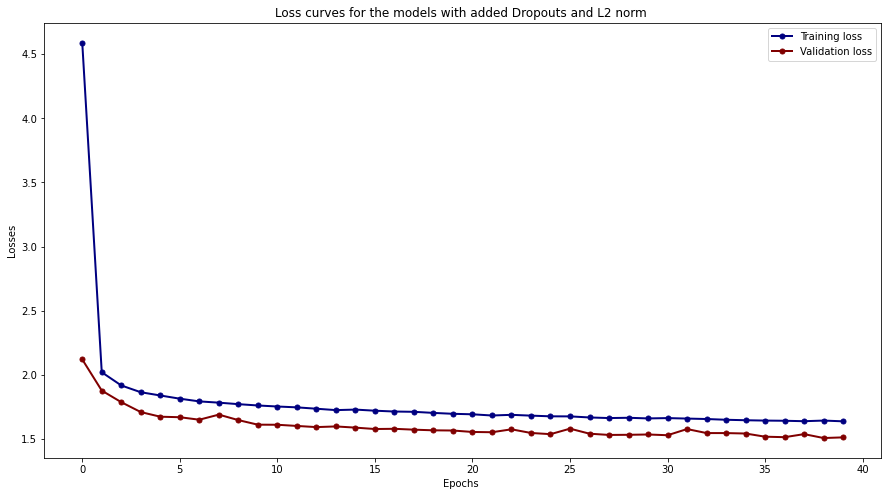

In [39]:
losses_L2= results_L2[["Training loss","Validation loss"]] 
accuracies_L2=results_L2[["Training accuracy","Validation accuracy"]]

ax = losses_L2.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Loss curves for the models with added Dropouts and L2 norm ')
# set labels for both axes
ax.set(xlabel='Epochs ', ylabel='Losses')
plt.show()

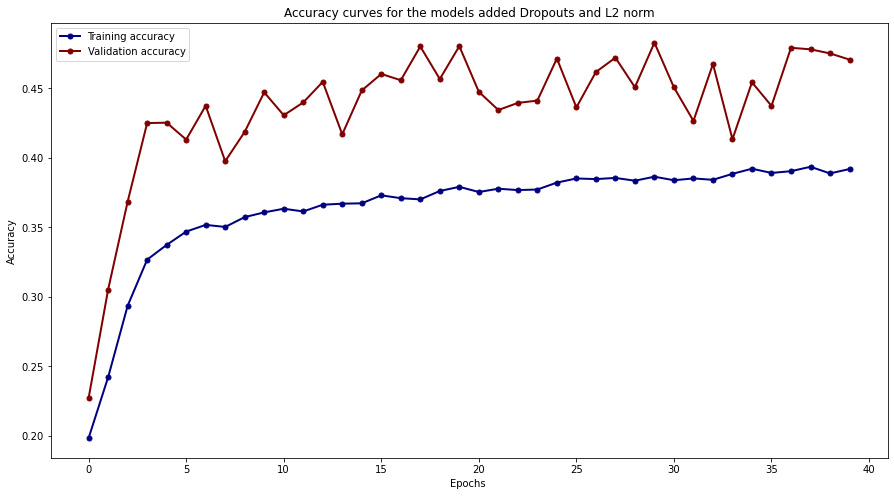

In [40]:
ax = accuracies_L2.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Accuracy curves for the models added Dropouts and L2 norm')
# set labels for both axes
ax.set(xlabel='Epochs ', ylabel='Accuracy')
plt.show()

# Accuracy score and classification report for model With added Dropout + L2 norm

In [41]:
L2_predictions= model_L2.predict_classes(X_test)
print(classification_report(y_True,L2_predictions))

              precision    recall  f1-score   support

           0       0.53      0.43      0.47      1783
           1       0.81      0.89      0.85      1777
           2       0.36      0.78      0.49      1822
           3       0.51      0.58      0.54      1810
           4       0.17      0.01      0.01      1787
           5       0.69      0.08      0.15      1855
           6       0.22      0.03      0.05      1803
           7       0.33      0.99      0.50      1728
           8       0.59      0.95      0.73      1816
           9       0.17      0.00      0.00      1819

    accuracy                           0.47     18000
   macro avg       0.44      0.47      0.38     18000
weighted avg       0.44      0.47      0.38     18000



# Confusion Matrix for Base mode With added Dropout + L2 Regularization

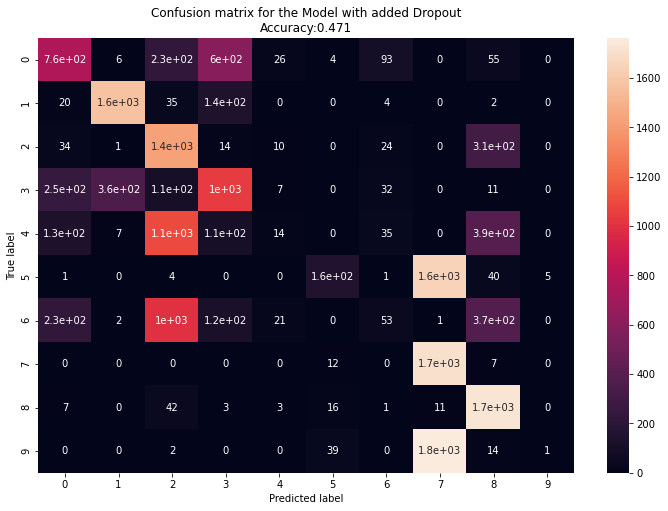

In [42]:
cm = confusion_matrix(y_True,L2_predictions) 
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion matrix for the Model with added Dropout\nAccuracy:{0:.3f}'.format(accuracy_score(y_True,L2_predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#  ROC AUC Scoring And Plotting

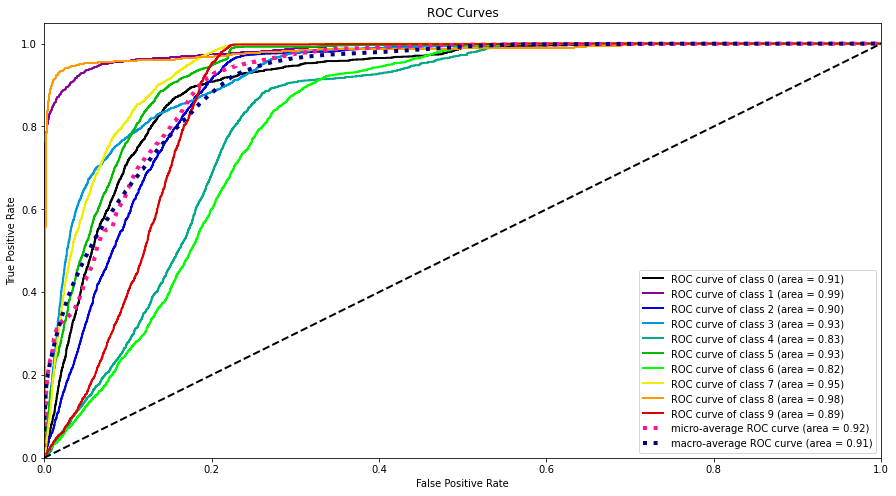

In [43]:
y_probas = model_L2.predict_proba(X_test)
skplt.metrics.plot_roc(y_actual, y_probas)

plt.show()

In [44]:
auc1 =  roc_auc_score(y_actual, y_probas, multi_class="ovo")
auc1

0.9125023421134423

In [45]:
auc2 =  roc_auc_score(y_actual, y_probas, multi_class="ovr")
auc2

0.9125875103170846

# Precision-Recall curves

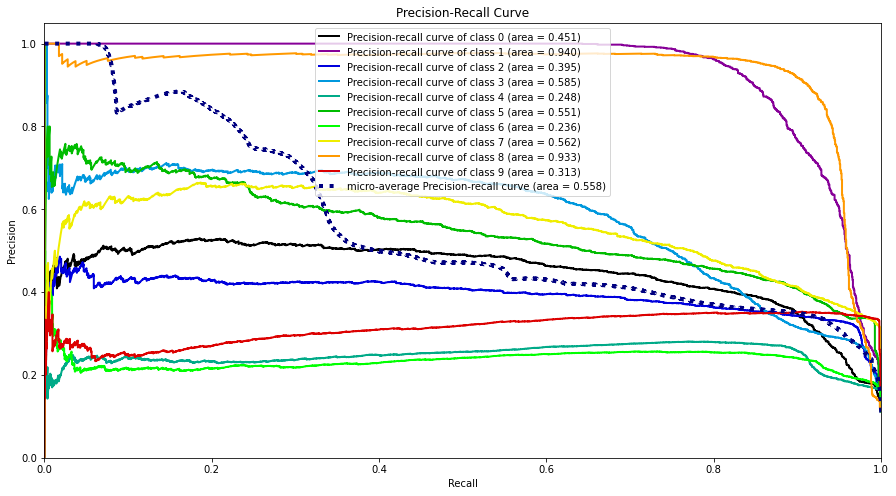

In [46]:
skplt.metrics.plot_precision_recall(y_actual, y_probas)
plt.show()